In [13]:
import uproot
import numpy as np
import matplotlib.pylab as plt
import pandas
from scipy.optimize import curve_fit

### Read in root file

In [14]:
file = uproot.open("ROOTfiles/GF_HHH_04.root")
file_TRSM = uproot.open("ROOTfiles/TRSM_pp_hhh.root")
tree = file["LHEF"]
tree_TRSM = file_TRSM["LHEF"]

### Make np arrays from different leafs
---

In [15]:
PID = tree['Particle.PID'].array()
E = tree['Particle.E'].array()
px = tree['Particle.Px'].array()
py = tree['Particle.Py'].array()
pz = tree['Particle.Pz'].array()
eta = tree['Particle.Eta'].array()
phi = tree['Particle.Phi'].array()
Weight = tree['Event.Weight'].array()

In [16]:
PID_TRSM = tree_TRSM['Particle.PID'].array()
E_TRSM = tree_TRSM['Particle.E'].array()
px_TRSM = tree_TRSM['Particle.Px'].array()
py_TRSM = tree_TRSM['Particle.Py'].array()
pz_TRSM = tree_TRSM['Particle.Pz'].array()
eta_TRSM = tree_TRSM['Particle.Eta'].array()
phi_TRSM = tree_TRSM['Particle.Phi'].array()
Weight_TRSM = tree_TRSM['Event.Weight'].array()

#### Calculating the total cross section

In [17]:
xs = np.sum(Weight)/len(Weight)
print('The total cross section is: '+str(xs)+ ' pb')

The total cross section is: 4.0768000000000014e-05 pb


In [18]:
xs_TRSM = np.sum(Weight_TRSM)/len(Weight_TRSM)
print('The total cross section is: '+str(xs_TRSM)+ ' pb')

The total cross section is: 0.048288625999999994 pb


#### Momentum
From the individual particles and the total momentum

In [19]:
'''
Px, Py and Pz subtracting for each individual particle
'''
Px_g0 = [px[i][0] for i in range(len(PID))]
Px_g1 = [px[i][1] for i in range(len(PID))]
Px_h0 = [px[i][2] for i in range(len(PID))]
Px_h1 = [px[i][3] for i in range(len(PID))]
Px_h2 = [px[i][4] for i in range(len(PID))]
    
Py_g0 = [py[i][0] for i in range(len(PID))]
Py_g1 = [py[i][1] for i in range(len(PID))]
Py_h0 = [py[i][2] for i in range(len(PID))]
Py_h1 = [py[i][3] for i in range(len(PID))]
Py_h2 = [py[i][4] for i in range(len(PID))]
    
Pz_g0 = [pz[i][0] for i in range(len(PID))]
Pz_g1 = [pz[i][1] for i in range(len(PID))]
Pz_h0 = [pz[i][2] for i in range(len(PID))]
Pz_h1 = [pz[i][3] for i in range(len(PID))]
Pz_h2 = [pz[i][4] for i in range(len(PID))]

'''
Pz eind
'''
P_z = [*Pz_h0, *Pz_h1, *Pz_h2]


'''
Transverse momentum
'''
P_trans = []
for x in range(len(Px_h0)):
    P_trans.append(np.sqrt((Py_h0[x] + Py_h1[x] + Py_h2[x])**2 + (Px_h0[x] + Px_h1[x] + Px_h2[x])**2))

'''
Total absolute momentum
'''
Pt_h0 = []
Pt_h1 = []
Pt_h2 = []
for x in range(len(Px_h0)):
    Pt_h0.append(np.sqrt(Px_h0[x]**2 + Py_h0[x]**2 + Pz_h0[x]**2))
    Pt_h1.append(np.sqrt(Px_h1[x]**2 + Py_h1[x]**2 + Pz_h1[x]**2))
    Pt_h2.append(np.sqrt(Px_h2[x]**2 + Py_h2[x]**2 + Pz_h2[x]**2))

P_tot = [*Pt_h0, *Pt_h1, *Pt_h2]

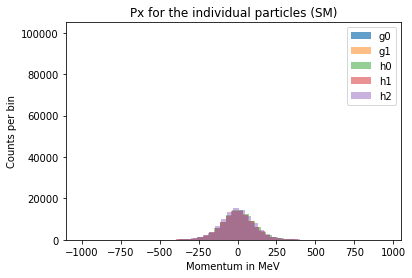

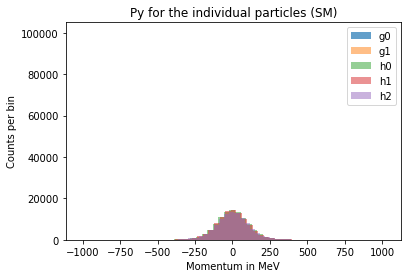

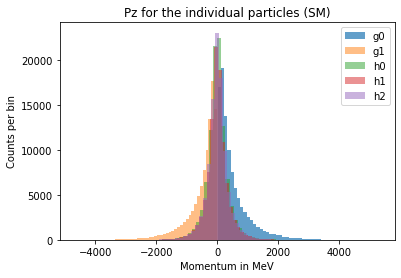

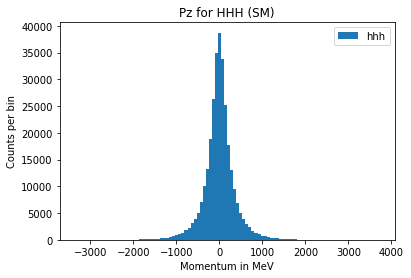

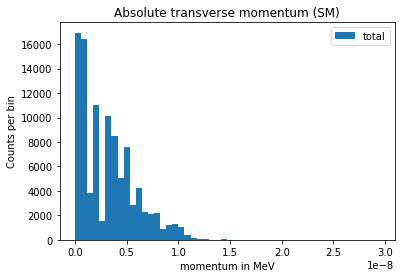

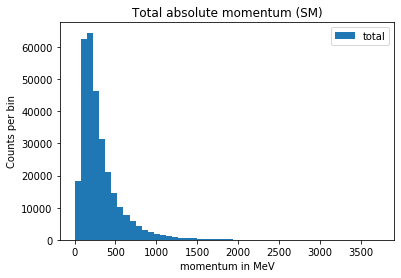

In [20]:
count_cos, bins_cos, ignored = plt.hist(Px_g0, 50, alpha=0.7, label = 'g0')
count_cos, bins_cos, ignored = plt.hist(Px_g1, 50, alpha=0.5, label = 'g1')
count_cos, bins_cos, ignored = plt.hist(Px_h0, 50, alpha=0.5, label = 'h0')
count_cos, bins_cos, ignored = plt.hist(Px_h1, 50, alpha=0.5, label = 'h1')
count_cos, bins_cos, ignored = plt.hist(Px_h2, 50, alpha=0.5, label = 'h2')
plt.title("Px for the individual particles (SM)")
plt.xlabel("Momentum in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

count_cos, bins_cos, ignored = plt.hist(Py_g0, 50, alpha=0.7, label = 'g0')
count_cos, bins_cos, ignored = plt.hist(Py_g1, 50, alpha=0.5, label = 'g1')
count_cos, bins_cos, ignored = plt.hist(Py_h0, 50, alpha=0.5, label = 'h0')
count_cos, bins_cos, ignored = plt.hist(Py_h1, 50, alpha=0.5, label = 'h1')
count_cos, bins_cos, ignored = plt.hist(Py_h2, 50, alpha=0.5, label = 'h2')
plt.title("Py for the individual particles (SM)")
plt.xlabel("Momentum in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

count_cos, bins_cos, ignored = plt.hist(Pz_g0, 50, alpha=0.7, label = 'g0')
count_cos, bins_cos, ignored = plt.hist(Pz_g1, 50, alpha=0.5, label = 'g1')
count_cos, bins_cos, ignored = plt.hist(Pz_h0, 50, alpha=0.5, label = 'h0')
count_cos, bins_cos, ignored = plt.hist(Pz_h1, 50, alpha=0.5, label = 'h1')
count_cos, bins_cos, ignored = plt.hist(Pz_h2, 50, alpha=0.5, label = 'h2')
plt.title("Pz for the individual particles (SM)")
plt.xlabel("Momentum in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()


count_cos, bins_cos, ignored = plt.hist(P_z, 100, alpha=1, label = 'hhh')
plt.title("Pz for HHH (SM)")
plt.xlabel("Momentum in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()


count_cos, bins_cos, ignored = plt.hist(P_trans, 50, alpha=1, label = 'total')
plt.title("Absolute transverse momentum (SM)")
plt.xlabel("momentum in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

count_cos, bins_cos, ignored = plt.hist(P_tot, 50, alpha=1, label = 'total')
plt.title("Total absolute momentum (SM)")
plt.xlabel("momentum in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

In [21]:
'''
Px, Py and Pz subtracting for each individual particle
'''
Px_g0_T = [px_TRSM[i][0] for i in range(len(PID))]
Px_g1_T = [px_TRSM[i][1] for i in range(len(PID))]
Px_h0_T = [px_TRSM[i][2] for i in range(len(PID))]
Px_h1_T = [px_TRSM[i][3] for i in range(len(PID))]
Px_h2_T = [px_TRSM[i][4] for i in range(len(PID))]
    
Py_g0_T = [py_TRSM[i][0] for i in range(len(PID))]
Py_g1_T = [py_TRSM[i][1] for i in range(len(PID))]
Py_h0_T = [py_TRSM[i][2] for i in range(len(PID))]
Py_h1_T = [py_TRSM[i][3] for i in range(len(PID))]
Py_h2_T = [py_TRSM[i][4] for i in range(len(PID))]
    
Pz_g0_T = [pz_TRSM[i][0] for i in range(len(PID))]
Pz_g1_T = [pz_TRSM[i][1] for i in range(len(PID))]
Pz_h0_T = [pz_TRSM[i][2] for i in range(len(PID))]
Pz_h1_T = [pz_TRSM[i][3] for i in range(len(PID))]
Pz_h2_T = [pz_TRSM[i][4] for i in range(len(PID))]

'''
Pz eind
'''
P_z_T = [*Pz_h0_T, *Pz_h1_T, *Pz_h2_T]


'''
Transverse momentum
'''
P_trans_T = []
for x in range(len(Px_h0_T)):
    P_trans_T.append(np.sqrt((Py_h0_T[x] + Py_h1_T[x] + Py_h2_T[x])**2 + (Px_h0_T[x] + Px_h1_T[x] + Px_h2_T[x])**2))


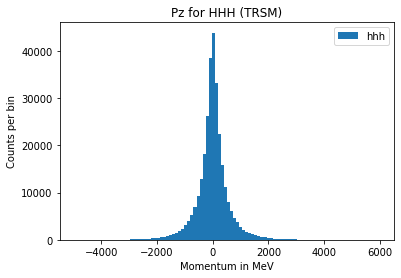

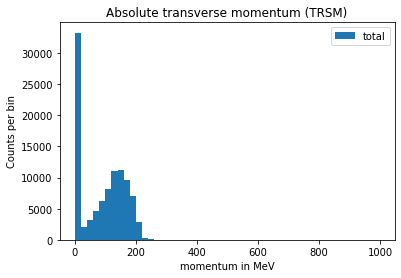

In [22]:
count_cos, bins_cos, ignored = plt.hist(P_z_T, 100, alpha=1, label = 'hhh')
plt.title("Pz for HHH (TRSM)")
plt.xlabel("Momentum in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()


count_cos, bins_cos, ignored = plt.hist(P_trans_T, 50, alpha=1, label = 'total')
plt.title("Absolute transverse momentum (TRSM)")
plt.xlabel("momentum in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

#### Comparing the transverse momenta for SM and TRSM

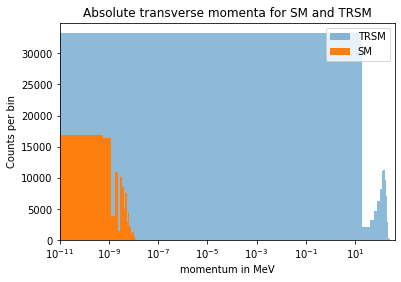

In [59]:
count_Pt_TRSM, bins_Pt_TRSM, ignored = plt.hist(P_trans_T, 50, alpha=0.5, label = 'TRSM')
count_Pt_SM, bins_Pt_SM, ignored = plt.hist(P_trans, 50, alpha=1, label = 'SM')
plt.title("Absolute transverse momenta for SM and TRSM")
plt.xlabel("momentum in MeV")
plt.ylabel("Counts per bin")
plt.xscale("log")
plt.xlim([10**(-11), 400])
plt.legend()
plt.show()

#### Energy
From the individual particles and the total energy

In [23]:
E_g0 = [E[i][0] for i in range(len(PID))]
E_g1 = [E[i][1] for i in range(len(PID))]
E_h0 = [E[i][2] for i in range(len(PID))]
E_h1 = [E[i][3] for i in range(len(PID))]
E_h2 = [E[i][4] for i in range(len(PID))]

E_tot = E_g0 + E_g1 + E_h0 + E_h1 + E_h2

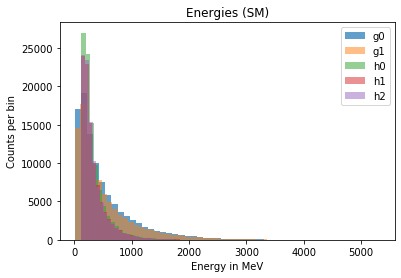

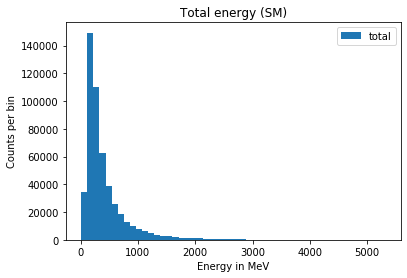

In [24]:
count_cos, bins_cos, ignored = plt.hist(E_g0, 50, alpha=0.7, label = 'g0')
count_cos, bins_cos, ignored = plt.hist(E_g1, 50, alpha=0.5, label = 'g1')
count_cos, bins_cos, ignored = plt.hist(E_h0, 50, alpha=0.5, label = 'h0')
count_cos, bins_cos, ignored = plt.hist(E_h1, 50, alpha=0.5, label = 'h1')
count_cos, bins_cos, ignored = plt.hist(E_h2, 50, alpha=0.5, label = 'h2')
plt.title("Energies (SM)")
plt.xlabel("Energy in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()


count_cos, bins_cos, ignored = plt.hist(E_tot, 50, alpha=1, label = 'total')
plt.title("Total energy (SM)")
plt.xlabel("Energy in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

In [25]:
E_g0_T = [E_TRSM[i][0] for i in range(len(PID))]
E_g1_T = [E_TRSM[i][1] for i in range(len(PID))]
E_h0_T = [E_TRSM[i][2] for i in range(len(PID))]
E_h1_T = [E_TRSM[i][3] for i in range(len(PID))]
E_h2_T = [E_TRSM[i][4] for i in range(len(PID))]

E_tot_T = E_g0_T + E_g1_T + E_h0_T + E_h1_T + E_h2_T

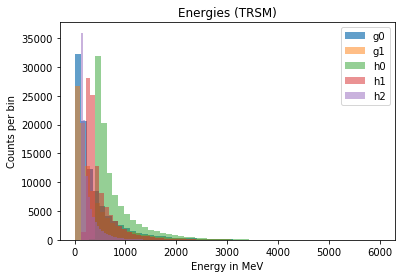

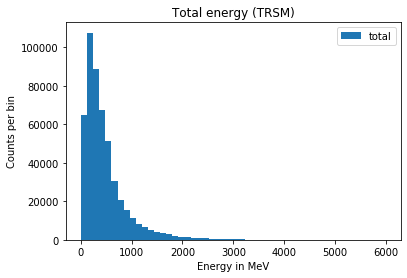

In [26]:
count_cos, bins_cos, ignored = plt.hist(E_g0_T, 50, alpha=0.7, label = 'g0')
count_cos, bins_cos, ignored = plt.hist(E_g1_T, 50, alpha=0.5, label = 'g1')
count_cos, bins_cos, ignored = plt.hist(E_h0_T, 50, alpha=0.5, label = 'h0')
count_cos, bins_cos, ignored = plt.hist(E_h1_T, 50, alpha=0.5, label = 'h1')
count_cos, bins_cos, ignored = plt.hist(E_h2_T, 50, alpha=0.5, label = 'h2')
plt.title("Energies (TRSM)")
plt.xlabel("Energy in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()


count_cos, bins_cos, ignored = plt.hist(E_tot_T, 50, alpha=1, label = 'total')
plt.title("Total energy (TRSM)")
plt.xlabel("Energy in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

#### Invariant mass

In [27]:
'''
Invariant mass SM
'''
M_inv = []
for x in range(len(Px_h0)):
    M_inv.append(np.sqrt((E_h0[x]+E_h1[x]+E_h2[x])**2 - (Px_h0[x]+Px_h1[x]+Px_h2[x])**2 - (Py_h0[x]+Py_h1[x]+Py_h2[x])**2 - (Pz_h0[x]+Pz_h1[x]+Pz_h2[x])**2))


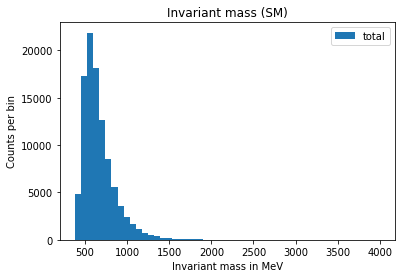

In [28]:
count_cos, bins_cos, ignored = plt.hist(M_inv, 50, alpha=1, label = 'total')
plt.title("Invariant mass (SM)")
plt.xlabel("Invariant mass in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

In [29]:
'''
Invariant mass TRSM
'''
M_inv_T = []
for x in range(len(Px_h0_T)):
    M_inv_T.append(np.sqrt((E_h0_T[x]+E_h1_T[x]+E_h2_T[x])**2 - (Px_h0_T[x]+Px_h1_T[x]+Px_h2_T[x])**2 - (Py_h0_T[x]+Py_h1_T[x]+Py_h2_T[x])**2 - (Pz_h0_T[x]+Pz_h1_T[x]+Pz_h2_T[x])**2))


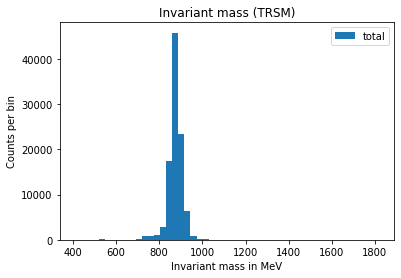

In [30]:
count_cos, bins_cos, ignored = plt.hist(M_inv_T, 50, alpha=1, label = 'total')
plt.title("Invariant mass (TRSM)")
plt.xlabel("Invariant mass in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

#### Comparing the transverse momenta for SM and TRSM

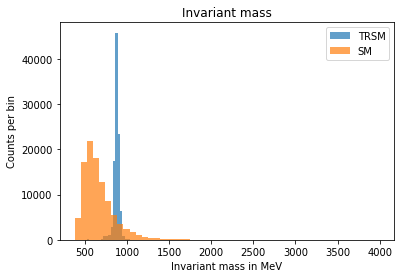

In [62]:
count_cos, bins_cos, ignored = plt.hist(M_inv_T, 50, alpha=0.7, label = 'TRSM')
count_cos, bins_cos, ignored = plt.hist(M_inv, 50, alpha=0.7, label = 'SM')
plt.title("Invariant mass")
plt.xlabel("Invariant mass in MeV")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

#### Pseudo rapidity

In [31]:
eta_g0 = [eta[i][0] for i in range(len(PID))]
eta_g1 = [eta[i][1] for i in range(len(PID))]
eta_h0 = [eta[i][2] for i in range(len(PID))]
eta_h1 = [eta[i][3] for i in range(len(PID))]
eta_h2 = [eta[i][4] for i in range(len(PID))]
Eta = eta_h0 + eta_h1 + eta_h2

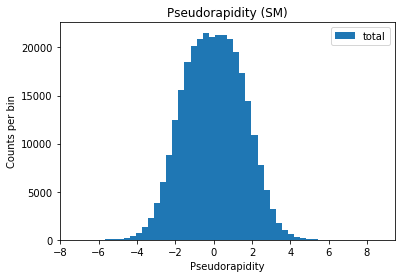

In [46]:
count_cos, bins_cos, ignored = plt.hist(Eta, 50, alpha=1, label = 'total')
plt.title("Pseudorapidity (SM)")
plt.xlabel("Pseudorapidity")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

In [37]:
eta_g0_T = [eta_TRSM[i][0] for i in range(len(PID))]
eta_g1_T = [eta_TRSM[i][1] for i in range(len(PID))]
eta_h0_T = [eta_TRSM[i][2] for i in range(len(PID))]
eta_h1_T = [eta_TRSM[i][3] for i in range(len(PID))]
eta_h2_T = [eta_TRSM[i][4] for i in range(len(PID))]
Eta_T = eta_h0_T + eta_h1_T + eta_h2_T

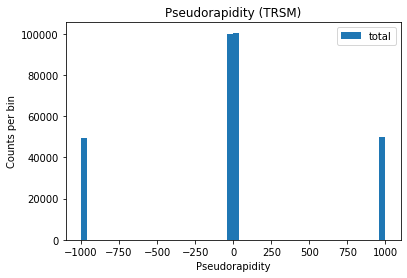

In [38]:
count_cos, bins_cos, ignored = plt.hist(Eta_T, 50, alpha=1, label = 'total')
plt.title("Pseudorapidity (TRSM)")
plt.xlabel("Pseudorapidity")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

#### Phi

In [33]:
phi_g0 = [phi[i][0] for i in range(len(PID))]
phi_g1 = [phi[i][1] for i in range(len(PID))]
phi_h0 = [phi[i][2] for i in range(len(PID))]
phi_h1 = [phi[i][3] for i in range(len(PID))]
phi_h2 = [phi[i][4] for i in range(len(PID))]
Phi = phi_h0 + phi_h1 + phi_h2

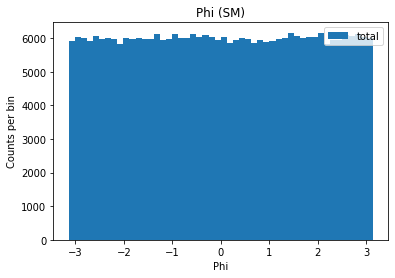

In [45]:
count_cos, bins_cos, ignored = plt.hist(Phi, 50, alpha=1, label = 'total')
plt.title("Phi (SM)")
plt.xlabel("Phi")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

In [39]:
phi_g0_T = [phi_TRSM[i][0] for i in range(len(PID))]
phi_g1_T = [phi_TRSM[i][1] for i in range(len(PID))]
phi_h0_T = [phi_TRSM[i][2] for i in range(len(PID))]
phi_h1_T = [phi_TRSM[i][3] for i in range(len(PID))]
phi_h2_T = [phi_TRSM[i][4] for i in range(len(PID))]
Phi_T = phi_h0_T + phi_h1_T + phi_h2_T

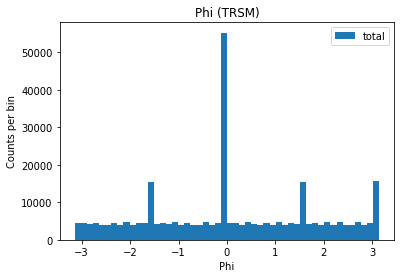

In [40]:
count_cos, bins_cos, ignored = plt.hist(Phi_T, 50, alpha=1, label = 'total')
plt.title("Phi (TRSM)")
plt.xlabel("Phi")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

#### R value

In [35]:
Phi = np.asarray(Phi)
Eta = np.asarray(Eta)

R = np.sqrt(Phi**2 + Eta**2)

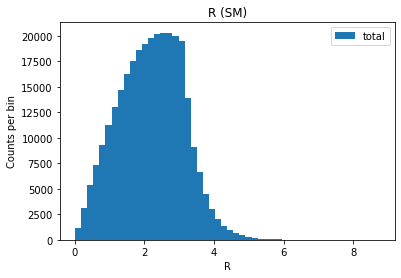

In [43]:
count_cos, bins_cos, ignored = plt.hist(R, 50, alpha=1, label = 'total')
plt.title("R (SM)")
plt.xlabel("R")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()

In [41]:
Phi_T = np.asarray(Phi_T)
Eta_T = np.asarray(Eta_T)

R_T = np.sqrt(Phi_T**2 + Eta_T**2)

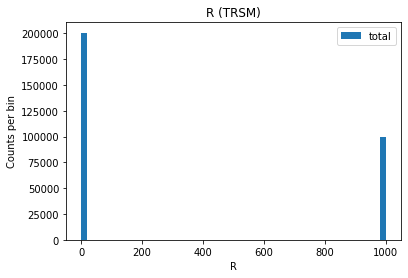

In [42]:
count_cos, bins_cos, ignored = plt.hist(R_T, 50, alpha=1, label = 'total')
plt.title("R (TRSM)")
plt.xlabel("R")
plt.ylabel("Counts per bin")
plt.legend()
plt.show()